In [1]:
num_of_lamps = 4
search_space_qubits = 2
helper_qubits = num_of_lamps - 1
number_of_iterations = 1

{'00': 10000}


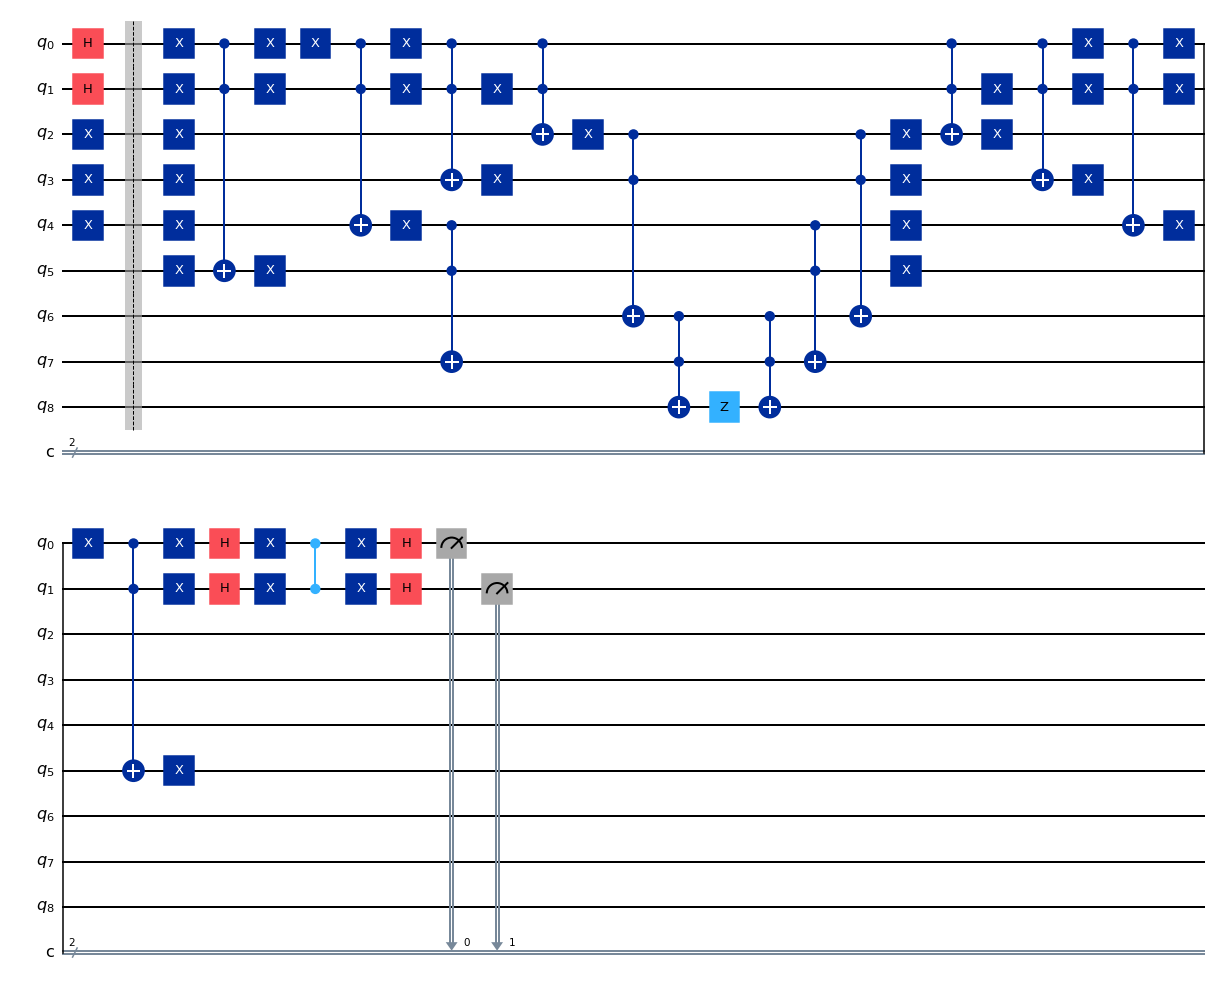

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

oracle = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.ccx(0,1,search_space_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.z(search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(0,1,search_space_qubits)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

grover = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits, search_space_qubits)

#Input
grover.x(search_space_qubits)
grover.x(search_space_qubits+1)
grover.x(search_space_qubits+2)

for i in range(search_space_qubits):
    grover.h(i)
grover.barrier()

for i in range(number_of_iterations):
    grover = grover.compose(oracle)
    
    for j in range(search_space_qubits):
        grover.h(j)
    for j in range(search_space_qubits):
        grover.x(j)
    grover.cz(0,1)
    for j in range(search_space_qubits):
        grover.x(j)
    for j in range(search_space_qubits):
        grover.h(j)

grover.measure(range(search_space_qubits),range(search_space_qubits))

job = AerSimulator().run(grover,shots=10000)
counts = job.result().get_counts(grover)
print(counts)

grover.draw(output='mpl')

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(
    
)

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()

print('Least busy:')
service.least_busy(simulator=False, operational=True, min_num_qubits=5)

Least busy:


<IBMBackend('ibm_fez')>

In [5]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h4ctnea9qs7391nhg0
>>> Job Status: QUEUED


In [6]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 703, '00': 1952, '10': 726, '11': 619}


In [7]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h4fqfea9qs7391nkag
>>> Job Status: QUEUED


In [8]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'00': 1820, '01': 759, '11': 641, '10': 780}


In [9]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h4gf4pe0pc73aluag0
>>> Job Status: QUEUED


In [10]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'11': 681, '01': 727, '10': 891, '00': 1701}


In [11]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h51rkpe0pc73alutfg
>>> Job Status: QUEUED


In [12]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'00': 1551, '01': 705, '11': 653, '10': 1091}


In [13]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h54ov67pic7384vag0
>>> Job Status: QUEUED


In [14]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 707, '00': 1506, '10': 1043, '11': 744}


In [15]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h554kpe0pc73alv0u0
>>> Job Status: QUEUED


In [16]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'00': 1647, '10': 1074, '01': 656, '11': 623}


In [17]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h55bfea9qs7391ob6g
>>> Job Status: QUEUED


In [19]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'10': 977, '00': 1729, '01': 656, '11': 638}


In [20]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h58tn67pic7384ves0
>>> Job Status: QUEUED


In [21]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'10': 944, '00': 1456, '01': 797, '11': 803}


In [22]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h591n67pic7384vf20
>>> Job Status: QUEUED


In [23]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'00': 1577, '01': 781, '10': 910, '11': 732}


In [24]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h599n67pic7384vfa0
>>> Job Status: QUEUED


In [25]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 611, '00': 1685, '10': 1126, '11': 578}


In [26]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5b9nea9qs7391oi10
>>> Job Status: QUEUED


In [27]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 1072, '11': 928, '00': 1022, '10': 978}


In [28]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5bo2gim5s73ahhiv0
>>> Job Status: QUEUED


In [29]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 841, '00': 1341, '11': 837, '10': 981}


Expected result 11

{'11': 10000}


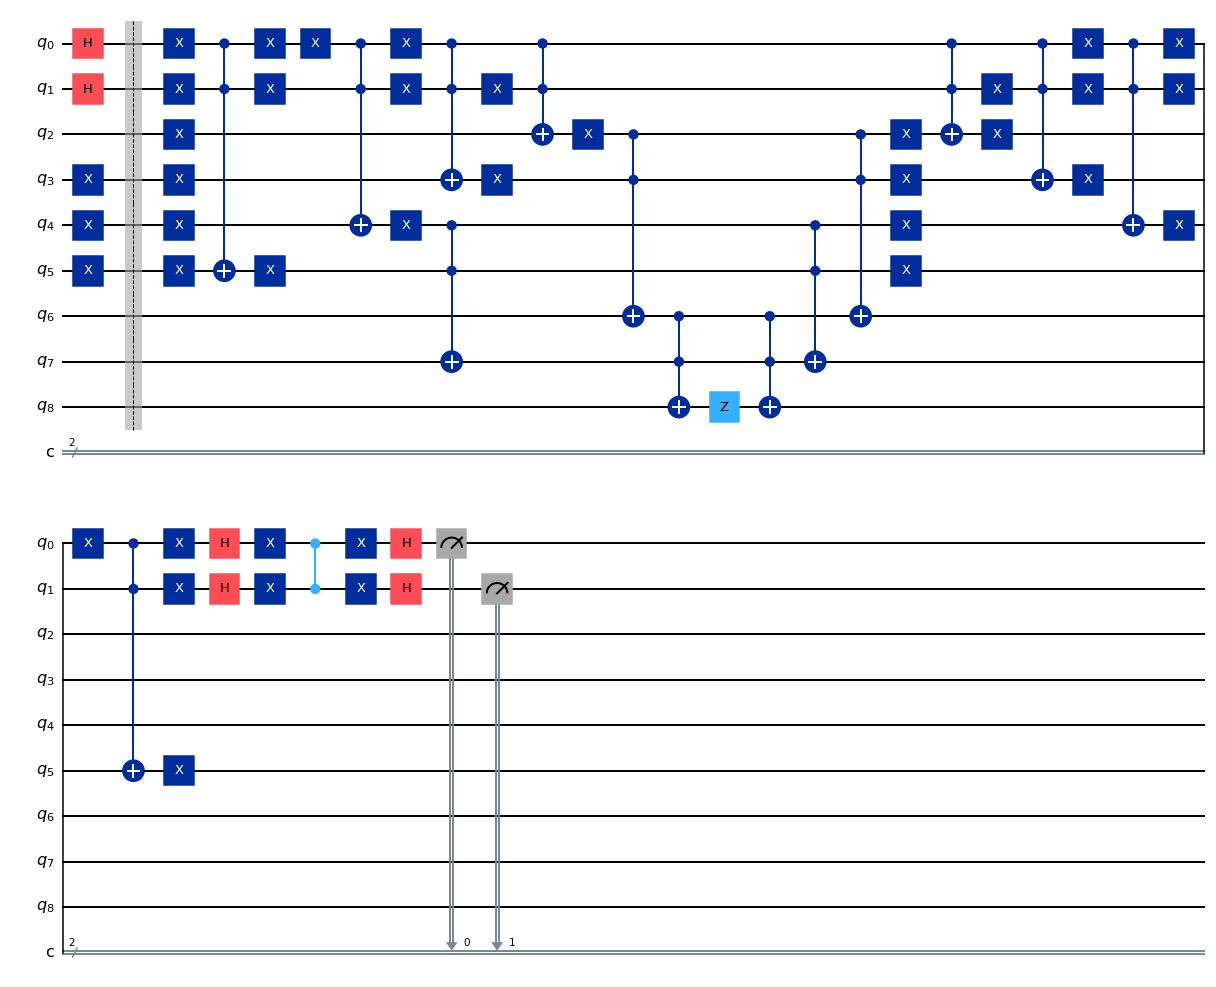

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

oracle = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.ccx(0,1,search_space_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.z(search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(0,1,search_space_qubits)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

grover = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits, search_space_qubits)

#Input
grover.x(search_space_qubits+1)
grover.x(search_space_qubits+2)
grover.x(search_space_qubits+3)

for i in range(search_space_qubits):
    grover.h(i)
grover.barrier()

for i in range(number_of_iterations):
    grover = grover.compose(oracle)
    
    for j in range(search_space_qubits):
        grover.h(j)
    for j in range(search_space_qubits):
        grover.x(j)
    grover.cz(0,1)
    for j in range(search_space_qubits):
        grover.x(j)
    for j in range(search_space_qubits):
        grover.h(j)

grover.measure(range(search_space_qubits),range(search_space_qubits))

job = AerSimulator().run(grover,shots=10000)
counts = job.result().get_counts(grover)
print(counts)

grover.draw(output='mpl')

In [31]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5cdcpe0pc73alv8p0
>>> Job Status: QUEUED


In [32]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'11': 2018, '00': 563, '10': 703, '01': 716}


In [33]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5doigim5s73ahhl1g
>>> Job Status: QUEUED


In [34]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'10': 797, '01': 933, '11': 1417, '00': 853}


In [35]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5dvigim5s73ahhl8g
>>> Job Status: QUEUED


In [36]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'11': 1796, '01': 896, '10': 709, '00': 599}


In [37]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5eqqgim5s73ahhm9g
>>> Job Status: QUEUED


In [38]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'00': 621, '11': 1896, '01': 731, '10': 752}


In [39]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5fon67pic7384vm6g
>>> Job Status: QUEUED


In [40]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'10': 816, '01': 814, '11': 1528, '00': 842}


In [41]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5ftfea9qs7391omug
>>> Job Status: QUEUED


In [42]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 858, '11': 1633, '10': 800, '00': 709}


In [43]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5g2767pic7384vmg0
>>> Job Status: QUEUED


In [44]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 868, '11': 1780, '10': 708, '00': 644}


In [45]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5hligim5s73ahhpe0
>>> Job Status: QUEUED


In [46]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 865, '10': 957, '00': 718, '11': 1460}


In [47]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5ji2gim5s73ahhrg0
>>> Job Status: QUEUED


In [48]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 934, '11': 1553, '00': 754, '10': 759}


In [49]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5jmcpe0pc73alvgqg
>>> Job Status: QUEUED


In [50]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 1090, '00': 749, '11': 1370, '10': 791}


In [51]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5kqspe0pc73alvin0
>>> Job Status: QUEUED


In [52]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'00': 937, '01': 1097, '11': 1035, '10': 931}


In [53]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=0, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5h5m9f67pic7384vuj0
>>> Job Status: QUEUED


In [54]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 1091, '11': 1081, '10': 886, '00': 942}


In [55]:
from qiskit.qasm2 import dumps
qasm_str = dumps(grover)
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[9];
creg c[2];
x q[3];
x q[4];
x q[5];
h q[0];
h q[1];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8];
x q[2];
x q[3];
x q[4];
x q[5];
x q[0];
x q[1];
ccx q[0],q[1],q[5];
x q[0];
x q[1];
x q[0];
ccx q[0],q[1],q[4];
x q[0];
x q[1];
ccx q[0],q[1],q[3];
x q[1];
ccx q[0],q[1],q[2];
x q[2];
x q[3];
x q[4];
x q[5];
ccx q[2],q[3],q[6];
ccx q[4],q[5],q[7];
ccx q[6],q[7],q[8];
z q[8];
ccx q[6],q[7],q[8];
ccx q[4],q[5],q[7];
ccx q[2],q[3],q[6];
x q[2];
x q[3];
x q[4];
x q[5];
ccx q[0],q[1],q[2];
x q[1];
ccx q[0],q[1],q[3];
x q[1];
x q[0];
ccx q[0],q[1],q[4];
x q[0];
x q[0];
x q[1];
ccx q[0],q[1],q[5];
x q[0];
x q[1];
x q[2];
x q[3];
x q[4];
x q[5];
h q[0];
h q[1];
x q[0];
x q[1];
cz q[0],q[1];
x q[0];
x q[1];
h q[0];
h q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
